<a href="https://colab.research.google.com/github/Ved0715/KNN_Models/blob/main/Iris_c/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>IRIS SPECIES CLASSIFICATION </h1>**




Iris flowers have an unusual structure and appearance. The petals resemble a classic fleur-de-lis symbol, with some petals rising up while others cascade down. The center petals stand upright and are known botanically as standards. These tall petals stand like signal flags, waving in potential pollinators.

---



**<h2>Importing Libraries</h2>**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

**<h2>Dataset Preperation</h2>**

We are going to use a very famous dataset called Iris.

Attributes:

    1)sepal length in cm
    2)sepal width in cm
    3)petal length in cm
    4)petal width in cm

We will just use two features for easier visualization, sepal length and width.

Class:

    -Iris Setosa
    -Iris Versicolour
    -Iris Virginica

<img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png'>



NOTE: Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


<h4>Loading the dataset</h4>

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<h4>Describition the dataset</h4>

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<h4>Spleating into x and y</h4>

In [7]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [8]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

<h4>Spliting the dataset into train and test dataset </h4>

In [10]:

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True,
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)



In [11]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


<h4>Normalize dataset</h4>

In [12]:
scaler= Normalizer().fit(x_train)
normalized_x_train= scaler.transform(x_train)
normalized_x_test= scaler.transform(x_test)

In [13]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


<h4>Visualiting the dataset before and after Normalization</h4>

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

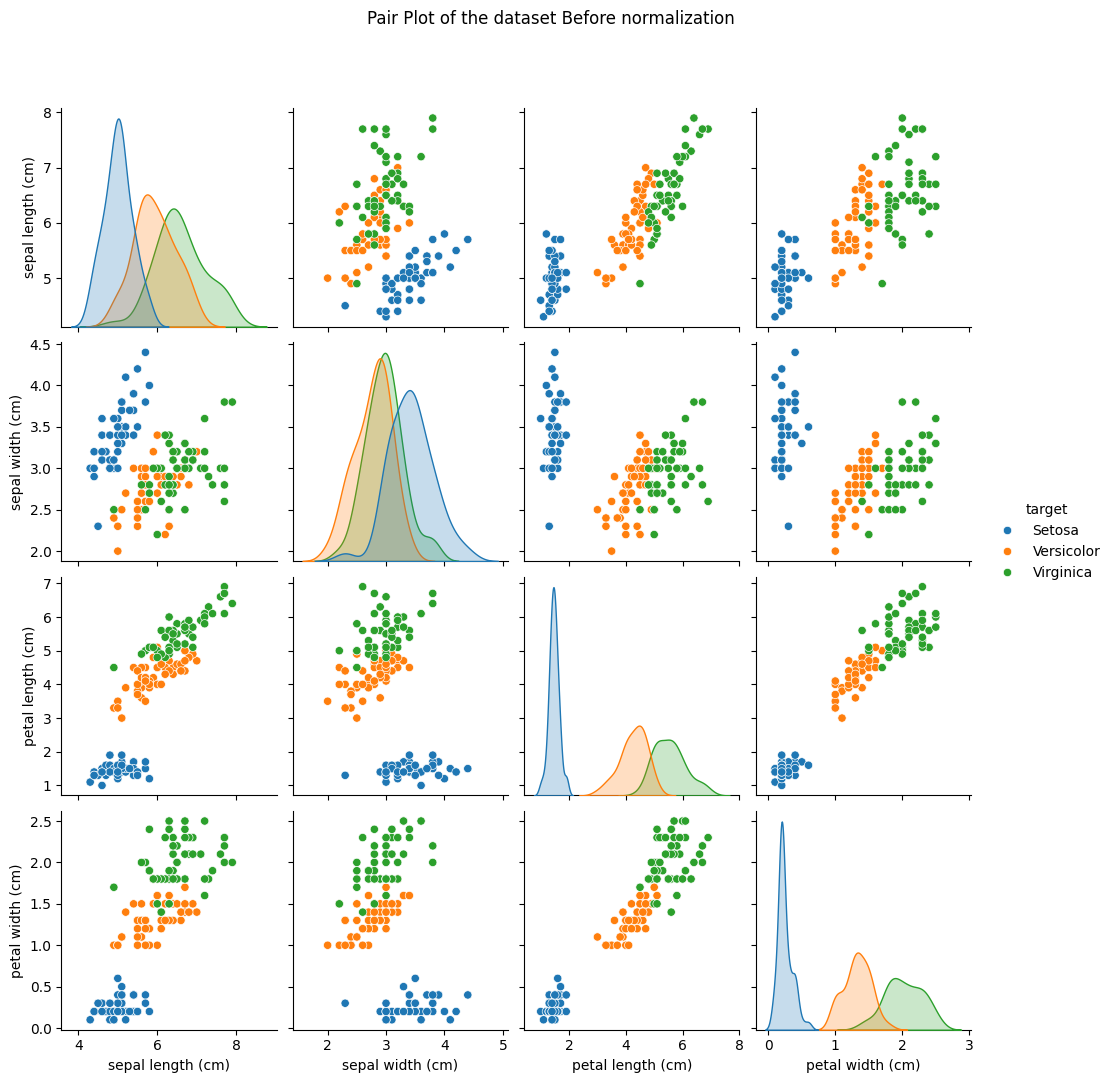

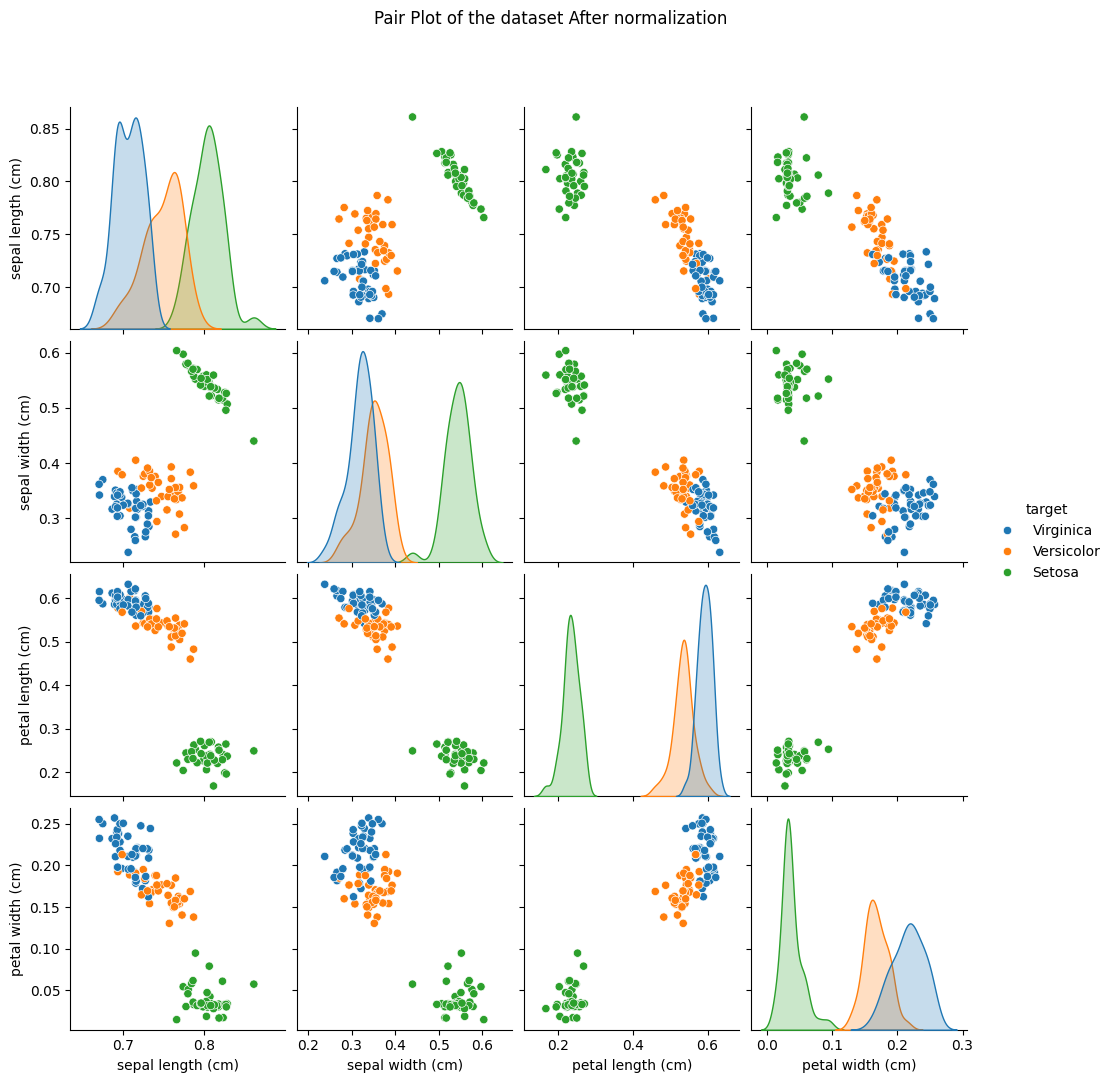

In [14]:
# Before

di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'}

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

# After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

**<h2>Model Preperation</h2>**

<h2>K Nearest Neighbor Model</h2>




KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y)
and would like to capture the relationship between x and y. More formally, our goal is to learn a function **h : X→Y** so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

<h3>KNN Step 1 (Euclidean Distance)<h3>

 The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let xi be an input sample with p features (xi1 , xi2 ,...,  xip), n be the total number of input samples (i=1,2,...,n). The Euclidean distance between sample xi and xl
is is defined as:<br>

**d( xi , xl ) =  √ (xi1 − xl1)^2 + (xi2 − xl2)^2 +...+ (xip −x lp)^2**

Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

In [15]:
def distance_ecu(x_train, x_test_point):

  distances= []
  for row in range(len(x_train)):
      current_train_point= x_train[row]
      current_distance= 0
      for col in range(len(current_train_point)):
          current_distance += (current_train_point[col] - x_test_point[col]) **2

      current_distance= np.sqrt(current_distance)
      distances.append(current_distance)

  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

<h3>KNN Step 2 (Find the nearest neighbors)</h3>

The **k** value in the k-NN algorithm defines how many neighbors will be checked to determine the classification of a specific query point. For example, if k=1, the instance will be assigned to the same class as its single nearest neighbor. <br>

Defining **k** can be a balancing act as different values can lead to overfitting or underfitting. Lower values of **k** can have high variance, but low bias, and larger values of k may lead to high bias and lower variance. The choice of **k** will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of **k**.

Overall, it is recommended to have an odd number for **k** to avoid ties in classification, and cross-validation tactics can help you choose the optimal **k** for your dataset

In [16]:
def nearest_neighbors(distance_point, K):

    df_nearest= distance_point.sort_values(by=['dist'], axis=0)
    df_nearest= df_nearest[:K]
    return df_nearest

<h3>KNN Step 3 (Classify the point based on a majority vote)</h3>

In [17]:
def voting(df_nearest, y_train):
    counter_vote= Counter(y_train[df_nearest.index])
    y_pred= counter_vote.most_common()[0][0]

    return y_pred

<h3>KNN Full Algorithm: Putting Everything Together</h3>

In [18]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    y_pred=[]
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  # Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  # Step 2
      y_pred_point    = voting(df_nearest_point, y_train) # Step 3
      y_pred.append(y_pred_point)

    return y_pred

<h3>Test the KNN Algorithm on the test dataset</h3>

In [19]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


<h3>Comparing our Implementation</h3>

In [20]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [21]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


<h3>Calcuting the accuracy</h3>

In [22]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667


**<h3>Perform Hyper-parameter Tuning using K-fold Cross Validation<h3>**

In [23]:
n_splits= 4
kf= KFold(n_splits= n_splits)

accuracy_k= []
k_values= list(range(1,30,2))
for k in k_values:
  accuracy_fold= 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train):
      normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx]
      y_train_fold= y_train[normalized_x_train_fold_idx]

      normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
      y_valid_fold= y_train[normalized_x_valid_fold_idx]
      y_pred_fold= KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

      accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold)
  accuracy_fold= accuracy_fold/ n_splits
  accuracy_k.append(accuracy_fold)



In [24]:
print(f'The accuracy for each K value was {list ( zip (accuracy_k, k_values))}')

The accuracy for each K value was [(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]


In [25]:
print(f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K= {k_values[np.argmax(accuracy_k)]}')

Best accuracy was 0.9666666666666668, which corresponds to a value of K= 1
